In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('ages_dataset.csv')
print(df.head())

     Id                     Name  \
0   Q23        George Washington   
1   Q42            Douglas Adams   
2   Q91          Abraham Lincoln   
3  Q254  Wolfgang Amadeus Mozart   
4  Q255     Ludwig van Beethoven   

                                 Short description Gender  \
0   1st president of the United States (1732–1799)   Male   
1                      English writer and humorist   Male   
2  16th president of the United States (1809-1865)   Male   
3        Austrian composer of the Classical period   Male   
4           German classical and romantic composer   Male   

                                             Country  Occupation  Birth year  \
0  United States of America; Kingdom of Great Bri...  Politician        1732   
1                                     United Kingdom      Artist        1952   
2                           United States of America  Politician        1809   
3    Archduchy of Austria; Archbishopric of Salzburg      Artist        1756   
4               

In [4]:
print(df.shape)

(1223009, 13)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 13 columns):
 #   Column                                    Non-Null Count    Dtype  
---  ------                                    --------------    -----  
 0   Id                                        1223009 non-null  object 
 1   Name                                      1223009 non-null  object 
 2   Short description                         1155109 non-null  object 
 3   Gender                                    1089363 non-null  object 
 4   Country                                   887500 non-null   object 
 5   Occupation                                1016095 non-null  object 
 6   Birth year                                1223009 non-null  int64  
 7   Death year                                1223008 non-null  float64
 8   Manner of death                           53603 non-null    object 
 9   Age of death                              1223008 non-null  float64
 10  Associ

In [6]:
# Manner of death analysis
death_df = df.dropna(subset="Manner of death")
print(death_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53603 entries, 0 to 1222958
Data columns (total 13 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Id                                        53603 non-null  object 
 1   Name                                      53603 non-null  object 
 2   Short description                         52946 non-null  object 
 3   Gender                                    52105 non-null  object 
 4   Country                                   48215 non-null  object 
 5   Occupation                                50472 non-null  object 
 6   Birth year                                53603 non-null  int64  
 7   Death year                                53603 non-null  float64
 8   Manner of death                           53603 non-null  object 
 9   Age of death                              53603 non-null  float64
 10  Associated Countries            

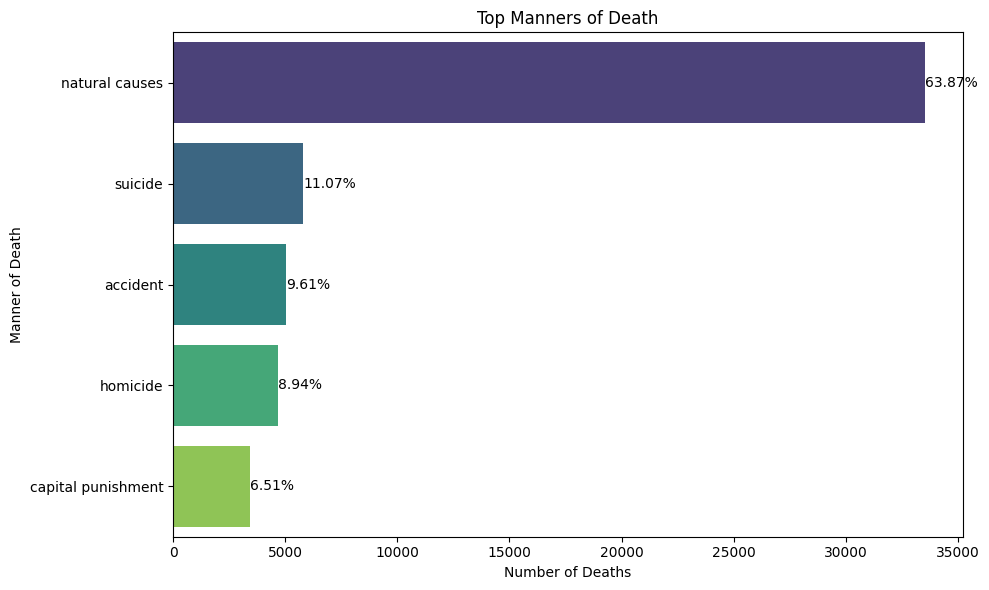

In [7]:

top_manners_of_death = death_df['Manner of death'].value_counts().head(5)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_manners_of_death.values, y=top_manners_of_death.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Deaths')
plt.ylabel('Manner of Death')
plt.title('Top Manners of Death')

# Add percentage labels on the bars
total_deaths = top_manners_of_death.sum()
for index, value in enumerate(top_manners_of_death.values):
    plt.text(value + 10, index, f'{value / total_deaths * 100:.2f}%', va='center')

# Show the plot
plt.tight_layout()
plt.show()

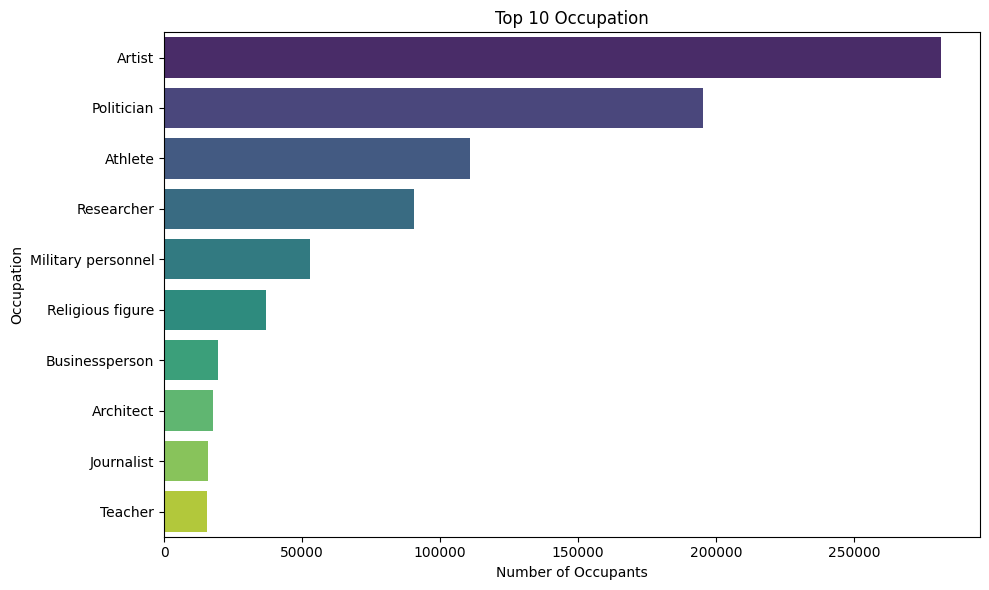

In [8]:
top_occupation = df['Occupation'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_occupation.values, y=top_occupation.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Occupants')
plt.ylabel('Occupation')
plt.title('Top 10 Occupation')

# Show the plot
plt.tight_layout()
plt.show()

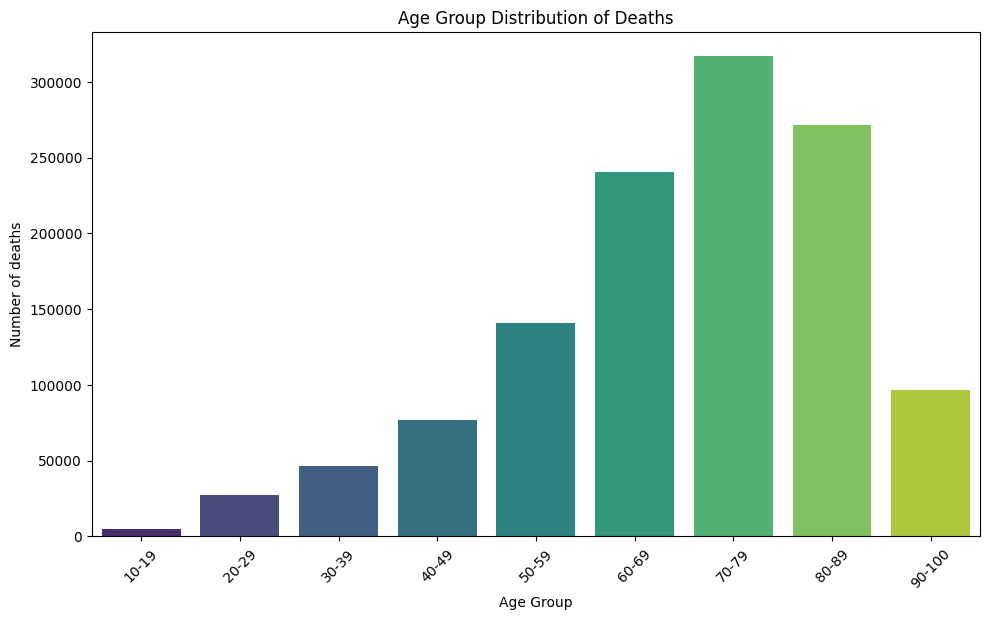

In [9]:
# Create age groups
age_bins = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']
df['Age Group'] = pd.cut(df['Age of death'], bins=age_bins, labels=age_labels, right=False)

# Count the occurrences of each age group
age_group_counts = df['Age Group'].value_counts().reindex(age_labels)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_counts.index, y=age_group_counts.values, palette='viridis')

# Add labels and title
plt.xlabel('Age Group')
plt.ylabel('Number of deaths')
plt.title('Age Group Distribution of Deaths')

# Show the plot
plt.tight_layout()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

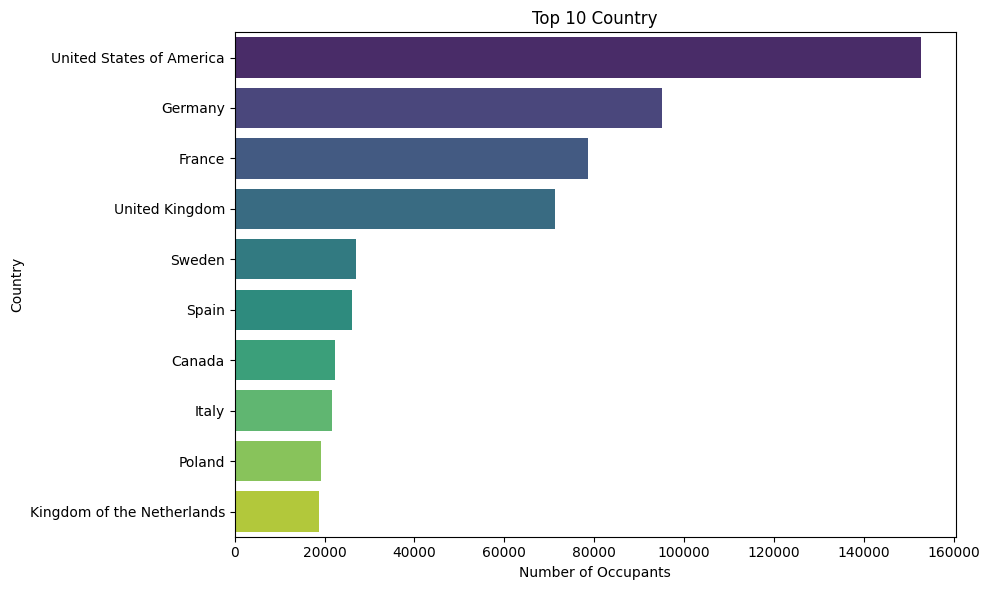

In [10]:
# Merge the entries for United Kingdom and Italy
uk_variations = ['United Kingdom', 'United Kingdom of Great Britain and Ireland', 'United Kingdom; United Kingdom of Great Britain and Ireland']
italy_variations = ['Italy', 'Italy; Kingdom of Italy']
df.loc[df['Country'].isin(uk_variations), 'Country'] = 'United Kingdom'
df.loc[df['Country'].isin(italy_variations), 'Country'] = 'Italy'


top_country = df['Country'].value_counts().head(10)

# Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=top_country.values, y=top_country.index, palette='viridis')

# Add labels and title
plt.xlabel('Number of Occupants')
plt.ylabel('Country')
plt.title('Top 10 Country')

# Show the plot
plt.tight_layout()
plt.show()